In [1]:
from dfply import *
from plotnine import *
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from scipy.stats import zscore
%matplotlib inline

I will import the data and start the cleaning process. For a big part of the cleaning process I wil use pandas library.

In [2]:
houses_areas = pd.read_csv("../raw_data/tpa_housing_exercise.csv")
houses_areas.shape

(20640, 10)

The data frame has 20640 rows and 10 columns, the columns names looks right

In [3]:
houses_areas.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
houses_areas.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY


The longitude and latitude are only numeric values.

In [5]:
houses_areas["longitude"] = pd.to_numeric(houses_areas["longitude"])
houses_areas["longitude"].isnull().sum()

0

The longitude is logical between -180 to 180 so any value outside this isn't valid. -1.000000e+18 isn't a valid longitud so we will drop it.

In [6]:
houses_areas >> mask(X.longitude < -180)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14441,-1.000000e+18,32.81,32,2402,551,1020,532,3.3942,307400,NEAR OCEAN


In [7]:
houses_areas >> mask(X.longitude > 180)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [8]:
houses_areas = houses_areas >> mask(between(X.longitude, -180, 180))

In [9]:
houses_areas >> mask(X.latitude == "38.52???")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52???,29,3873,797,2237,706,2.1736,72100,INLAND


The value of 38.52 in latitude is a real value and it is a place around to Sacramento California in USA, and it is actually in, so we will change this value to 38.52 withouth ???

In [10]:
houses_areas["latitude"].replace({'38.52???': "38.52"}, inplace = True)
houses_areas["latitude"] = pd.to_numeric(houses_areas["latitude"])
houses_areas["latitude"].isnull().sum()

0

The latitude only make sense when is between -90 to 90 so any value outside this will be considering an error

In [11]:
houses_areas = houses_areas >> mask(between(X.latitude, -90, 90))
houses_areas["housing_median_age"].sort_values(ascending = False).tail(20)

10410      2
59         2
18725      2
12868      2
16383      2
16566      2
19046      2
10336      2
19650      2
9109       2
13041      2
13713      2
9378       2
13374      2
12143      2
12286      1
3130       1
18972      1
19536      1
17246   -200
Name: housing_median_age, dtype: int64

In [12]:
houses_areas["housing_median_age"].isnull().sum()

0

It isn't logical a house with a median age of -200, in that area according to google maps some houses are very new. In this case we don't have enough evidence for calculate the average age so we will drop this line. And after we will convert this column to number, because it is age.

In [13]:
houses_areas >> mask(X.housing_median_age == -200)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17246,-119.67,34.42,-200,1333,393,1369,381,2.5947,232600,<1H OCEAN


In [14]:
houses_areas = houses_areas >> mask(X.housing_median_age > 0)
houses_areas["housing_median_age"] = pd.to_numeric(houses_areas["housing_median_age"])

total_rooms should be a integer value and higher or equal to total_beedrooms

In [15]:
(houses_areas >> select(X.housing_median_age)).apply(zscore)>> arrange(X.housing_median_age)>>head(50)

,housing_median_age
19536,-2.196097
12286,-2.196097
18972,-2.196097
3130,-2.196097
10529,-2.116643
12285,-2.116643
10519,-2.116643
12123,-2.116643
9187,-2.116643
18942,-2.116643


All the values are less than 3 standard desviation to the median, so we don't have a real outliers in the column housing_median_age

In [16]:
houses_areas["total_rooms"] = pd.to_numeric(houses_areas["total_rooms"])
houses_areas["total_rooms"].isnull().sum()

0

In [17]:
(houses_areas >> select(X.total_rooms)).apply(zscore) >> arrange(X.total_rooms) >> tail(50)

,total_rooms
5921,6.911820
17413,6.922362
6055,6.959949
12006,7.032371
14558,7.098834
8985,7.102960
12119,7.205634
18926,7.222136
5964,7.247804
570,7.333061


In [18]:
(houses_areas >> select(X.total_rooms)).apply(zscore) >> arrange(X.total_rooms) >> mask(X.total_rooms > 3)

,total_rooms
6060,3.007433
16559,3.011100
1260,3.016601
5963,3.034019
3388,3.035852
...,...
12201,12.749148
6057,13.484372
9880,13.747018
10309,16.180957


In the column total rooms we have 373 outliers, because we really want a data set that help us with the model we will drop the outliers.

In [19]:
houses_areas["zscore_total_rooms"] = (houses_areas >> select(X.total_rooms)).apply(zscore)
houses_areas = houses_areas >> mask(X.zscore_total_rooms <= 3) >> drop(X.zscore_total_rooms)

Here we will change the NaN values for 0 so we can make comparations with total_rooms and population and identify usefull patrons for filling the missing values. Also we will remove the not numerical values

In [20]:
houses_areas["total_bedrooms"].fillna(0, inplace= True)
houses_areas = houses_areas >> mask(X.total_bedrooms != "a")
houses_areas["total_bedrooms"] = pd.to_numeric(houses_areas["total_bedrooms"])
houses_areas >> mutate(rooms_bedrooms = X.total_rooms < X.total_bedrooms) >> mask (X.rooms_bedrooms == True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_bedrooms


In [21]:
(houses_areas >> select(X.total_bedrooms)).apply(zscore)>> arrange(X.total_bedrooms) >> mask(X.total_bedrooms >3)

,total_bedrooms
14922,3.002969
10622,3.006098
12135,3.012356
14913,3.012356
7850,3.021742
...,...
3603,6.942228
15659,7.036094
4253,7.180023
4266,7.705674


It is 358 outliers, let's remove them from our features

In [22]:
houses_areas["zscore_total_bedrooms"] = (houses_areas >> select(X.total_bedrooms)).apply(zscore)
houses_areas = houses_areas >> mask(X.zscore_total_bedrooms <= 3) >> drop(X.zscore_total_bedrooms)

In [23]:
houses_areas >> mask(X.population == "1823???")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
69,-122.29,37.81,46,2801,644,1823???,611,0.9802,129200,NEAR BAY


Here was probably a mistake when they type the population because a population of 1823 whit 644 bedrooms is quite normal. So we will remove the ???

In [24]:
houses_areas["population"].replace({'1823???': "1823"}, inplace = True)
houses_areas["population"] = pd.to_numeric(houses_areas["population"])

Here we can see that the number of bedrooms increase as the population increase more or less it is around 2 or 4 persons per beedroom, and this in some areas of California isn't that crazy.

In [25]:
(houses_areas >> select(X.population)).apply(zscore)>> arrange(X.population) >> mask(X.population > 3)

,population
9279,3.000328
9516,3.001633
11301,3.002937
14949,3.004241
4972,3.023808
...,...
16669,6.832844
13034,7.019382
18349,7.670310
19006,8.043387


It is 274 outliers in population we will drop them with the purpose of have a better quality data for our model

In [26]:
houses_areas["zscore_population"] = (houses_areas >> select(X.population)).apply(zscore)
houses_areas = houses_areas >> mask(X.zscore_population <= 3) >> drop(X.zscore_population)

In [27]:
houses_areas["households"].isnull().sum()

0

In [28]:
houses_areas >> mask(X.households == "422??")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
114,-122.25,37.83,35,1613,428,675,422??,3.4722,243100,NEAR BAY


This value doesn't look very crazy, the amount of households are close to the total of beedrooms but the total of rooms is quite high, so we belive this is a real value so we will keep it

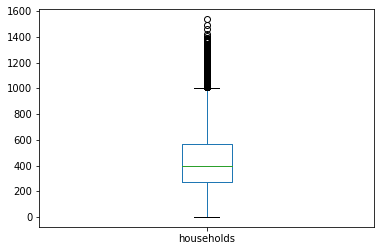

In [29]:
houses_areas["households"].replace({'422??': "422"}, inplace = True)
houses_areas["households"] = pd.to_numeric(houses_areas["households"])
houses_areas["households"].plot(kind = "box")

In [30]:
(houses_areas >> select(X.households)).apply(zscore) >> arrange(X.households) >> mask(X.households > 3)

,households
12200,3.001074
13529,3.005242
18489,3.005242
18714,3.009410
18014,3.009410
...,...
19252,4.018070
10291,4.093094
4629,4.255647
3778,4.380687


We have 218 Outliers in households column so we will remove them from our model

In [31]:
houses_areas["zscore_households"] = (houses_areas >> select(X.households)).apply(zscore)
houses_areas = houses_areas >> mask(X.zscore_households <= 3) >> drop(X.zscore_households)

In [32]:
houses_areas["median_income"] = pd.to_numeric(houses_areas["median_income"])
houses_areas["median_income"].isnull().sum()

0

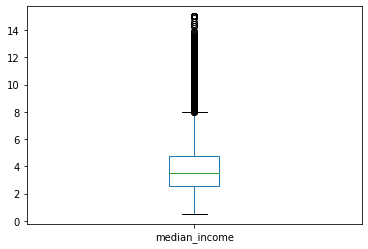

In [33]:
houses_areas["median_income"].plot(kind = "box")

It looks with some ourliers, let's check the real outliers

In [34]:
(houses_areas >> select(X.median_income)).apply(zscore) >> arrange(X.median_income) >> head(50)

,median_income
3258,-1.758676
13999,-1.758676
5213,-1.758676
19523,-1.758676
73,-1.758676
7125,-1.758676
6343,-1.758676
20091,-1.758676
4861,-1.758676
6688,-1.758676


It is 327 outliers let's drop them. Also it is a negative median income is a mistake so we will drop it

In [35]:
houses_areas = houses_areas >> mask(X.median_income > 0)
houses_areas["zscore_median_income"] = (houses_areas >> select(X.median_income)).apply(zscore)
houses_areas = houses_areas >> mask(X.zscore_median_income <= 3) >> drop(X.zscore_median_income)

In [36]:
houses_areas["median_house_value"].isnull().sum()

0

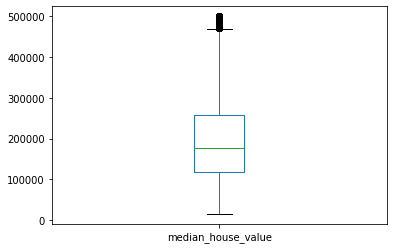

In [37]:
houses_areas["median_house_value"] = pd.to_numeric(houses_areas["median_house_value"])

houses_areas["median_house_value"].plot(kind = "box")

Here we can see that are some areas where the median value of the house is very high, let's check the real outliers.

In [38]:
(houses_areas >> select(X.median_house_value)).apply(zscore) >> arrange(X.median_house_value) >> tail(50)

,median_house_value
8637,2.687019
8862,2.687019
8863,2.687019
8864,2.687019
8903,2.687019
8923,2.687019
8924,2.687019
8928,2.687019
8934,2.687019
8935,2.687019


It isn't any real outlier in the column median house value. 

In [39]:
houses_areas.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', '<1H OCEAN??',
       'ISLAND'], dtype=object)

In [40]:
houses_areas >> mask(X.ocean_proximity == "<1H OCEAN??")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7611,-118.22,33.88,35,998,313,1335,311,1.6574,102500,<1H OCEAN??


According to google maps this point is 10.7 miles far away from the ocean, so you can be there in less than 20 minutes by car and less than 1 hour by bicycle, so we will onlye correct the mistake

In [41]:
houses_areas["ocean_proximity"].replace({'<1H OCEAN??': "<1H OCEAN"}, inplace = True)

Now we will fill the 0 values in the column total_bedrooms

Let's check the normal ration of population per bedroom

In [42]:
houses_areas >> mask(X.total_bedrooms != 0) >> mutate(population_per_bedroom = X.population / X.total_bedrooms) >> summarise_each([np.mean, np.median, np.std], X.population_per_bedroom)

,population_per_bedroom_mean,population_per_bedroom_median,population_per_bedroom_std
0,2.786653,2.690323,1.145058


The population per bedroom is around 2.5 persons per bedroom, let's be generous and say it is 3, even when the rules in. Now we should check the proportion between number of bedrooms and rooms.

In [43]:
houses_areas >> mask(X.total_bedrooms != 0) >> mutate(bedroom_per_room = X.total_bedrooms / X.total_rooms) >> summarise_each([np.mean, np.median, np.std], X.bedroom_per_room)

,bedroom_per_room_mean,bedroom_per_room_median,bedroom_per_room_std
0,0.213642,0.203693,0.056498


Normally it is 5 rooms by one bedroom. So for calculate the missing values we will first divide the population by 3 and the number of rooms we will divide by 5, and after we will sum them and divide by 2

In [44]:
houses_with_0 = houses_areas >> mask(X.total_bedrooms == 0) >> mutate(population_per_bedroom = X.population/3) >> mutate(bedroom_per_room = X.total_rooms/5) >> mutate(total_bedrooms = (X.bedroom_per_room + X.population_per_bedroom)/2)>> drop(X.bedroom_per_room, X.population_per_bedroom)
houses_with_0 = houses_with_0.round({"total_bedrooms" : 0})
houses_areas = houses_areas >> mask(X.total_bedrooms != 0)
houses_areas = houses_areas >> bind_rows(houses_with_0, join = "inner")


Now we will check how many people are per bedroom

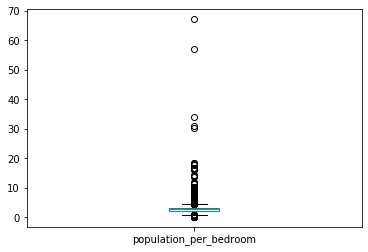

In [45]:
houses_areas = houses_areas >> mutate(population_per_bedroom = X.population / X.total_bedrooms) 
houses_areas["population_per_bedroom"].plot(kind = "box")

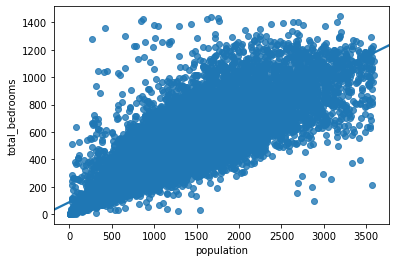

In [46]:
sns.regplot(x = "population", y = "total_bedrooms", data=houses_areas)

The population increase in parallel with the total of bedroom this is quite normal. Let's check the values

In [47]:
houses_areas >> arrange(X.population_per_bedroom) >> tail(50)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,population_per_bedroom
13596,-117.30,34.10,49,60,11.0,76,13,2.5625,75000,INLAND,6.909091
13426,-117.38,34.20,16,193,45.0,312,76,3.7578,137500,INLAND,6.933333
13425,-117.40,34.18,16,1769,254.0,1778,251,5.3671,181800,INLAND,7.000000
9785,-121.32,35.95,31,372,68.0,479,67,3.5547,200000,NEAR OCEAN,7.044118
13140,-121.41,38.34,24,1605,277.0,1966,250,3.0833,162500,INLAND,7.097473
3618,-118.44,34.26,34,325,60.0,433,83,5.5124,174300,<1H OCEAN,7.216667
17932,-121.94,37.35,52,906,227.0,1662,219,3.1667,231600,<1H OCEAN,7.321586
10908,-117.86,33.74,9,525,171.0,1257,165,3.3750,165300,<1H OCEAN,7.350877
4491,-118.21,34.06,30,511,153.0,1152,149,2.3611,156800,<1H OCEAN,7.529412
12842,-121.40,38.66,50,880,150.0,1148,148,2.5062,112500,INLAND,7.653333


To be honest, having more than 9 persons per bedroom sound unbelievable. The area that we are looking is quite expensive but the law only allow 2 per rent bedroom and the mean and median are arond 2 and 3 so probably if we are very generous we could continue say that 6 persons per bedroom is ok. So let's drop all the values higher than 6 (This is quite generous because we are even going more than 3 standard deviation from the mean)

In [51]:
houses_areas = houses_areas >> mask(X.population_per_bedroom <= 6 ) >> drop(X.population_per_bedroom)

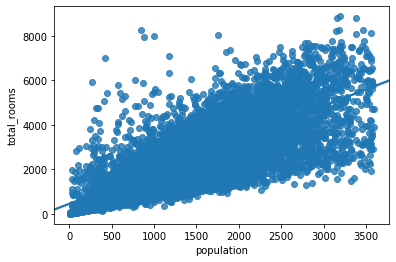

In [52]:
sns.regplot(x = "population", y = "total_rooms", data=houses_areas)

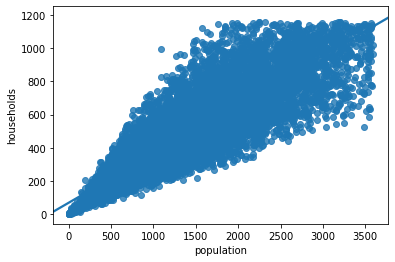

In [53]:
sns.regplot(x = "population", y = "households", data=houses_areas)

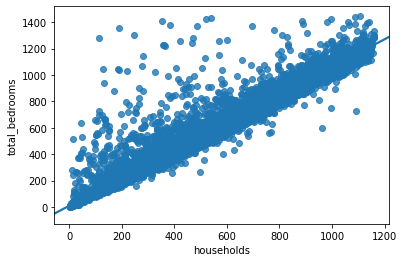

In [54]:
sns.regplot(x = "households", y = "total_bedrooms", data=houses_areas)

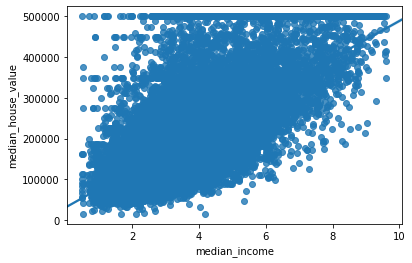

In [55]:
sns.regplot(x = "median_income", y = "median_house_value", data=houses_areas)

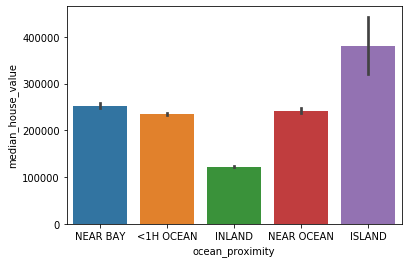

In [56]:
sns.barplot(x = "ocean_proximity", y = "median_house_value", data=houses_areas)

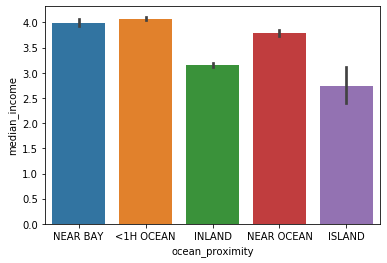

In [58]:
sns.barplot(x = "ocean_proximity", y = "median_income", data=houses_areas)

Here we can see that the median value of the house change a lot depend of the proximity to the ocean, the median income doesn't have the same behavior special in the island, this coul be because the island most of the time use to have more retired people leaving there and probably they don't have a very high income monthly and the t only have savers.

In [59]:
houses_areas.to_csv("../clean_data/houses_areas.csv", index = False)